In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
Image.MAX_IMAGE_PIXELS = None

Matplotlib created a temporary config/cache directory at /.config/matplotlib because the default path (/tmp/matplotlib-_qstrfew) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [19]:
# List images in a folder
sorted(glob.glob('/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160*'))

['/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,0,28672,512).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,1024,28672,1536).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,10240,28672,10752).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,10752,28672,11264).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,11264,28672,11776).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,11776,28672,12288).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,12288,28672,12800).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,12800,28672,13312).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,13312,28672,13824).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,13824,28672,14336).png',
 '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


Text(0.5, 1.0, 'Mask')

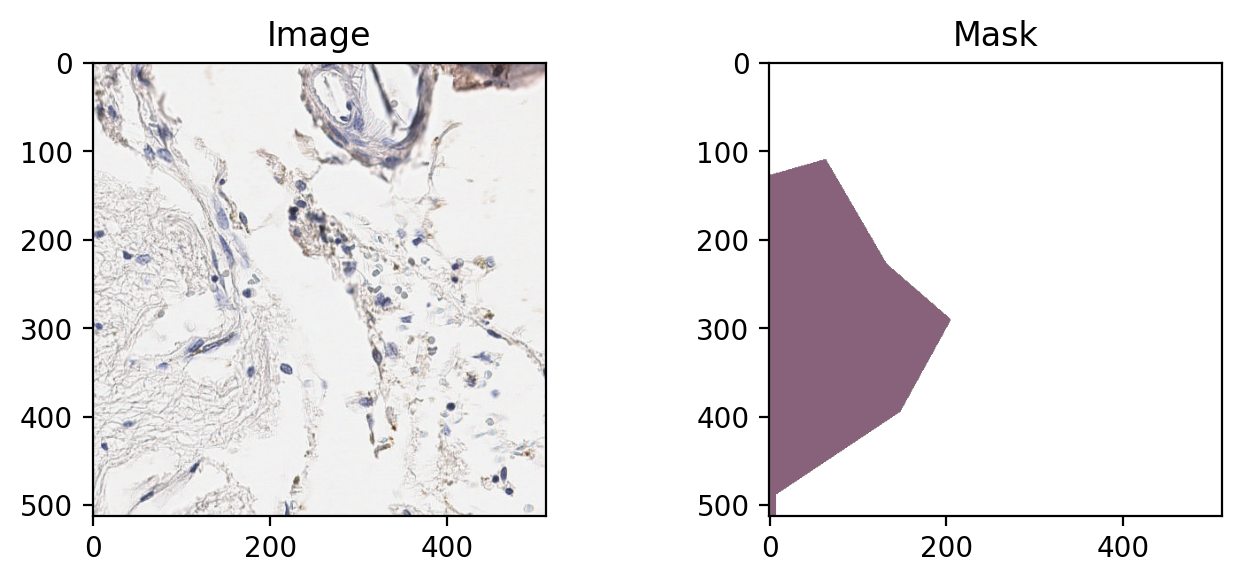

In [20]:
# Visualize image and mask
# Background: 0 (white), GM: 1 (purple), WM: 2 (blue)
svs_name = 'NA4450-02_AB'
tile_coord_str = '(28160,33280,28672,33792)'

_, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
axs[0].imshow(Image.open(f'/BrainSeg/data/patches_512/images/{svs_name}/{svs_name}_{tile_coord_str}.png'))
axs[0].set_title('Image')

print(np.array(Image.open(f'/BrainSeg/data/patches_512/masks/{svs_name}/{svs_name}_{tile_coord_str}.png')))
axs[1].imshow(Image.open(f'/BrainSeg/data/patches_512/masks/{svs_name}/{svs_name}_{tile_coord_str}.png'))
axs[1].set_title('Mask')

In [21]:
# List of images and masks for Grad-CAM
images = ['/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(12288,19456,12800,19968).png', # GM
          '/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(12288,40448,12800,40960).png', # WM
          '/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(10240,37888,10752,38400).png', # GM/WM 1
          '/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(13312,45056,13824,45568).png',  # GM/WM 2
          '/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(10240,39936,10752,40448).png',  # BK/WM
          '/BrainSeg/data/patches_512/images/NA5015-02_AB17-24/NA5015-02_AB17-24_(12288,53248,12800,53760).png',  # BK/GM
          '/BrainSeg/data/patches_512/images/NA4450-02_AB/NA4450-02_AB_(28160,33280,28672,33792).png'  # BK/GM (Residue)
          ]
truth_masks = [image.replace('images', 'masks') for image in images]

### Grad-CAM

In [5]:
import sys
sys.path.append("/BrainSeg/src")

import cv2
import tensorflow as tf
from tensorflow import keras

from networks.models.models import get_model, load_whole_model

In [6]:
model = load_whole_model('/BrainSeg/checkpoints/UNet_Zero_Pad_2019O-20200720_122933_fold_6/cp-005-0.8860.ckpt')
print('Whole model (weights + optimizer state) loaded')

# model = get_model('UNet_Zero_Pad_2019O')
# model.load_weights('/BrainSeg/checkpoints/UNet_Zero_Pad_2019O-20200720_122933_fold_6/cp-005-0.8860.ckpt/variables/variables').assert_existing_objects_matched()
# print('Model weights loaded')

#model = tf.keras.applications.VGG16(weights='imagenet')

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  TITAN Xp, compute capability 6.1
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
Whole model (weights + optimizer state) loaded


In [7]:
print([l.name for l in model.layers])

['Input', 'Conv1', 'Conv1_BN', 'Conv1_elu', 'Conv1_Drop', 'Conv2', 'Conv2_BN', 'Conv2_elu', 'MaxPool1', 'Conv3', 'Conv3_BN', 'Conv3_elu', 'Conv3_Drop', 'Conv4', 'Conv4_BN', 'Conv4_elu', 'MaxPool2', 'Conv5', 'Conv5_BN', 'Conv5_elu', 'Conv5_Drop', 'Conv6', 'Conv6_BN', 'Conv6_elu', 'MaxPool3', 'Conv7', 'Conv7_BN', 'Conv7_elu', 'Conv7_Drop', 'Conv8', 'Conv8_BN', 'Conv8_elu', 'MaxPool4', 'Conv9', 'Conv9_BN', 'Conv9_elu', 'Conv9_Drop', 'Conv10', 'Conv10_BN', 'Conv10_elu', 'UpConv1', 'UpConv1_BN', 'UpConv1_elu', 'Concate1', 'Conv11', 'Conv11_BN', 'Conv11_elu', 'Conv11_Drop', 'Conv12', 'Conv12_BN', 'Conv12_elu', 'UpConv2', 'UpConv2_BN', 'UpConv2_elu', 'Concate2', 'Conv13', 'Conv13_BN', 'Conv13_elu', 'Conv13_Drop', 'Conv14', 'Conv14_BN', 'Conv14_elu', 'UpConv3', 'UpConv3_BN', 'UpConv3_elu', 'Concate3', 'Conv15', 'Conv15_BN', 'Conv15_elu', 'Conv15_Drop', 'Conv16', 'Conv16_BN', 'Conv16_elu', 'UpConv4', 'UpConv4_BN', 'UpConv4_elu', 'Concate4', 'Conv17', 'Conv17_BN', 'Conv17_elu', 'Conv17_Drop', 'C

In [8]:
def grad_cam(input_model, input_image, class_idx, layer_name, use_guided_grads=False):
    grad_model = keras.models.Model([input_model.input], [input_model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(input_image)
        #loss = predictions[..., class_idx]
        loss = tf.reduce_sum(predictions[..., class_idx])
    
    output = tf.cast(conv_outputs[0], 'float32')
    grads = tape.gradient(loss, conv_outputs)[0]
    grads = tf.cast(grads, 'float32')
    #print(grads)
    
    if use_guided_grads: 
        gate_f = tf.cast(output > 0, 'float32')
        gate_r = tf.cast(grads > 0, 'float32')
        grads = gate_f * gate_r * grads
    
    weights = tf.reduce_mean(grads, axis=(0, 1))
    #print(weights)
    
    cam = np.ones(output.shape[0:2], dtype=np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam.numpy(), input_image.shape[1:3])
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    
    cam = np.uint8(255*heatmap)
    
    return predictions[0], cam

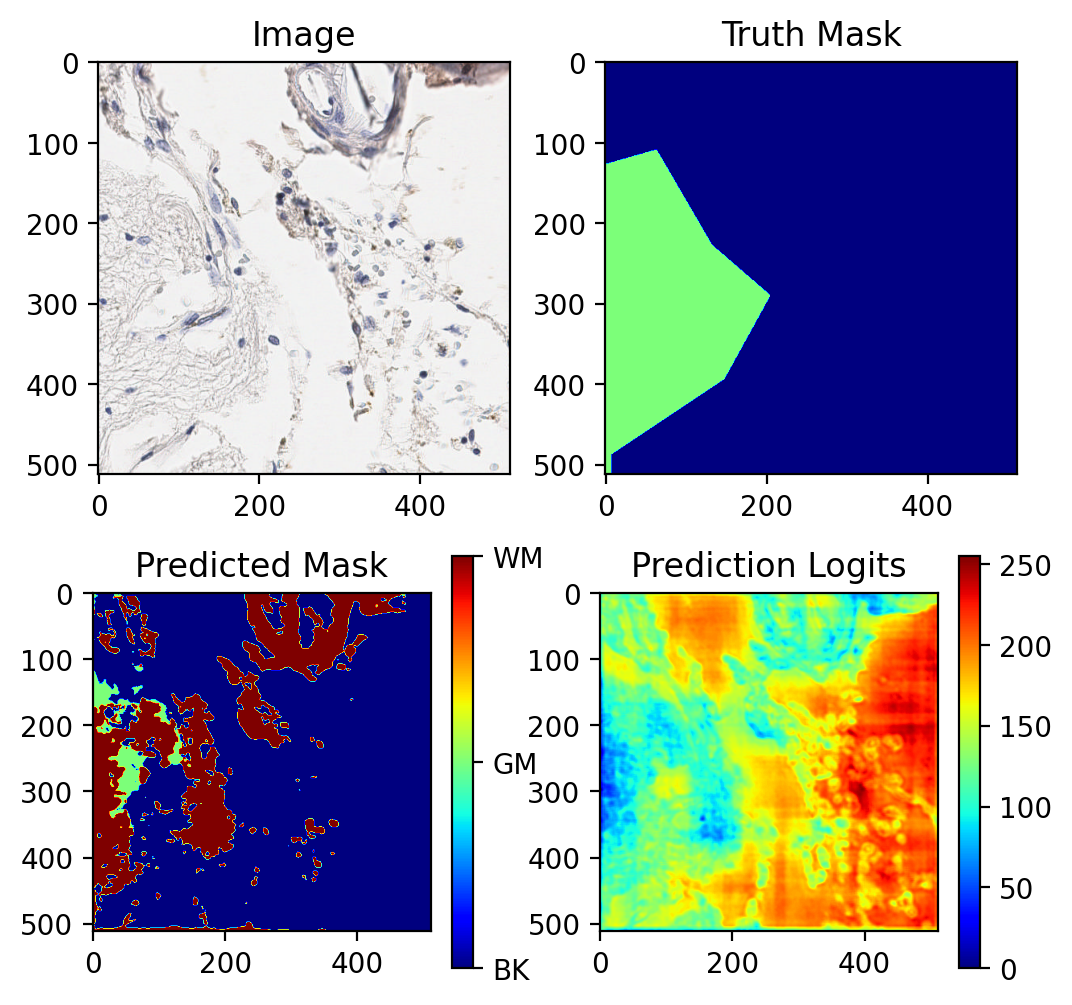

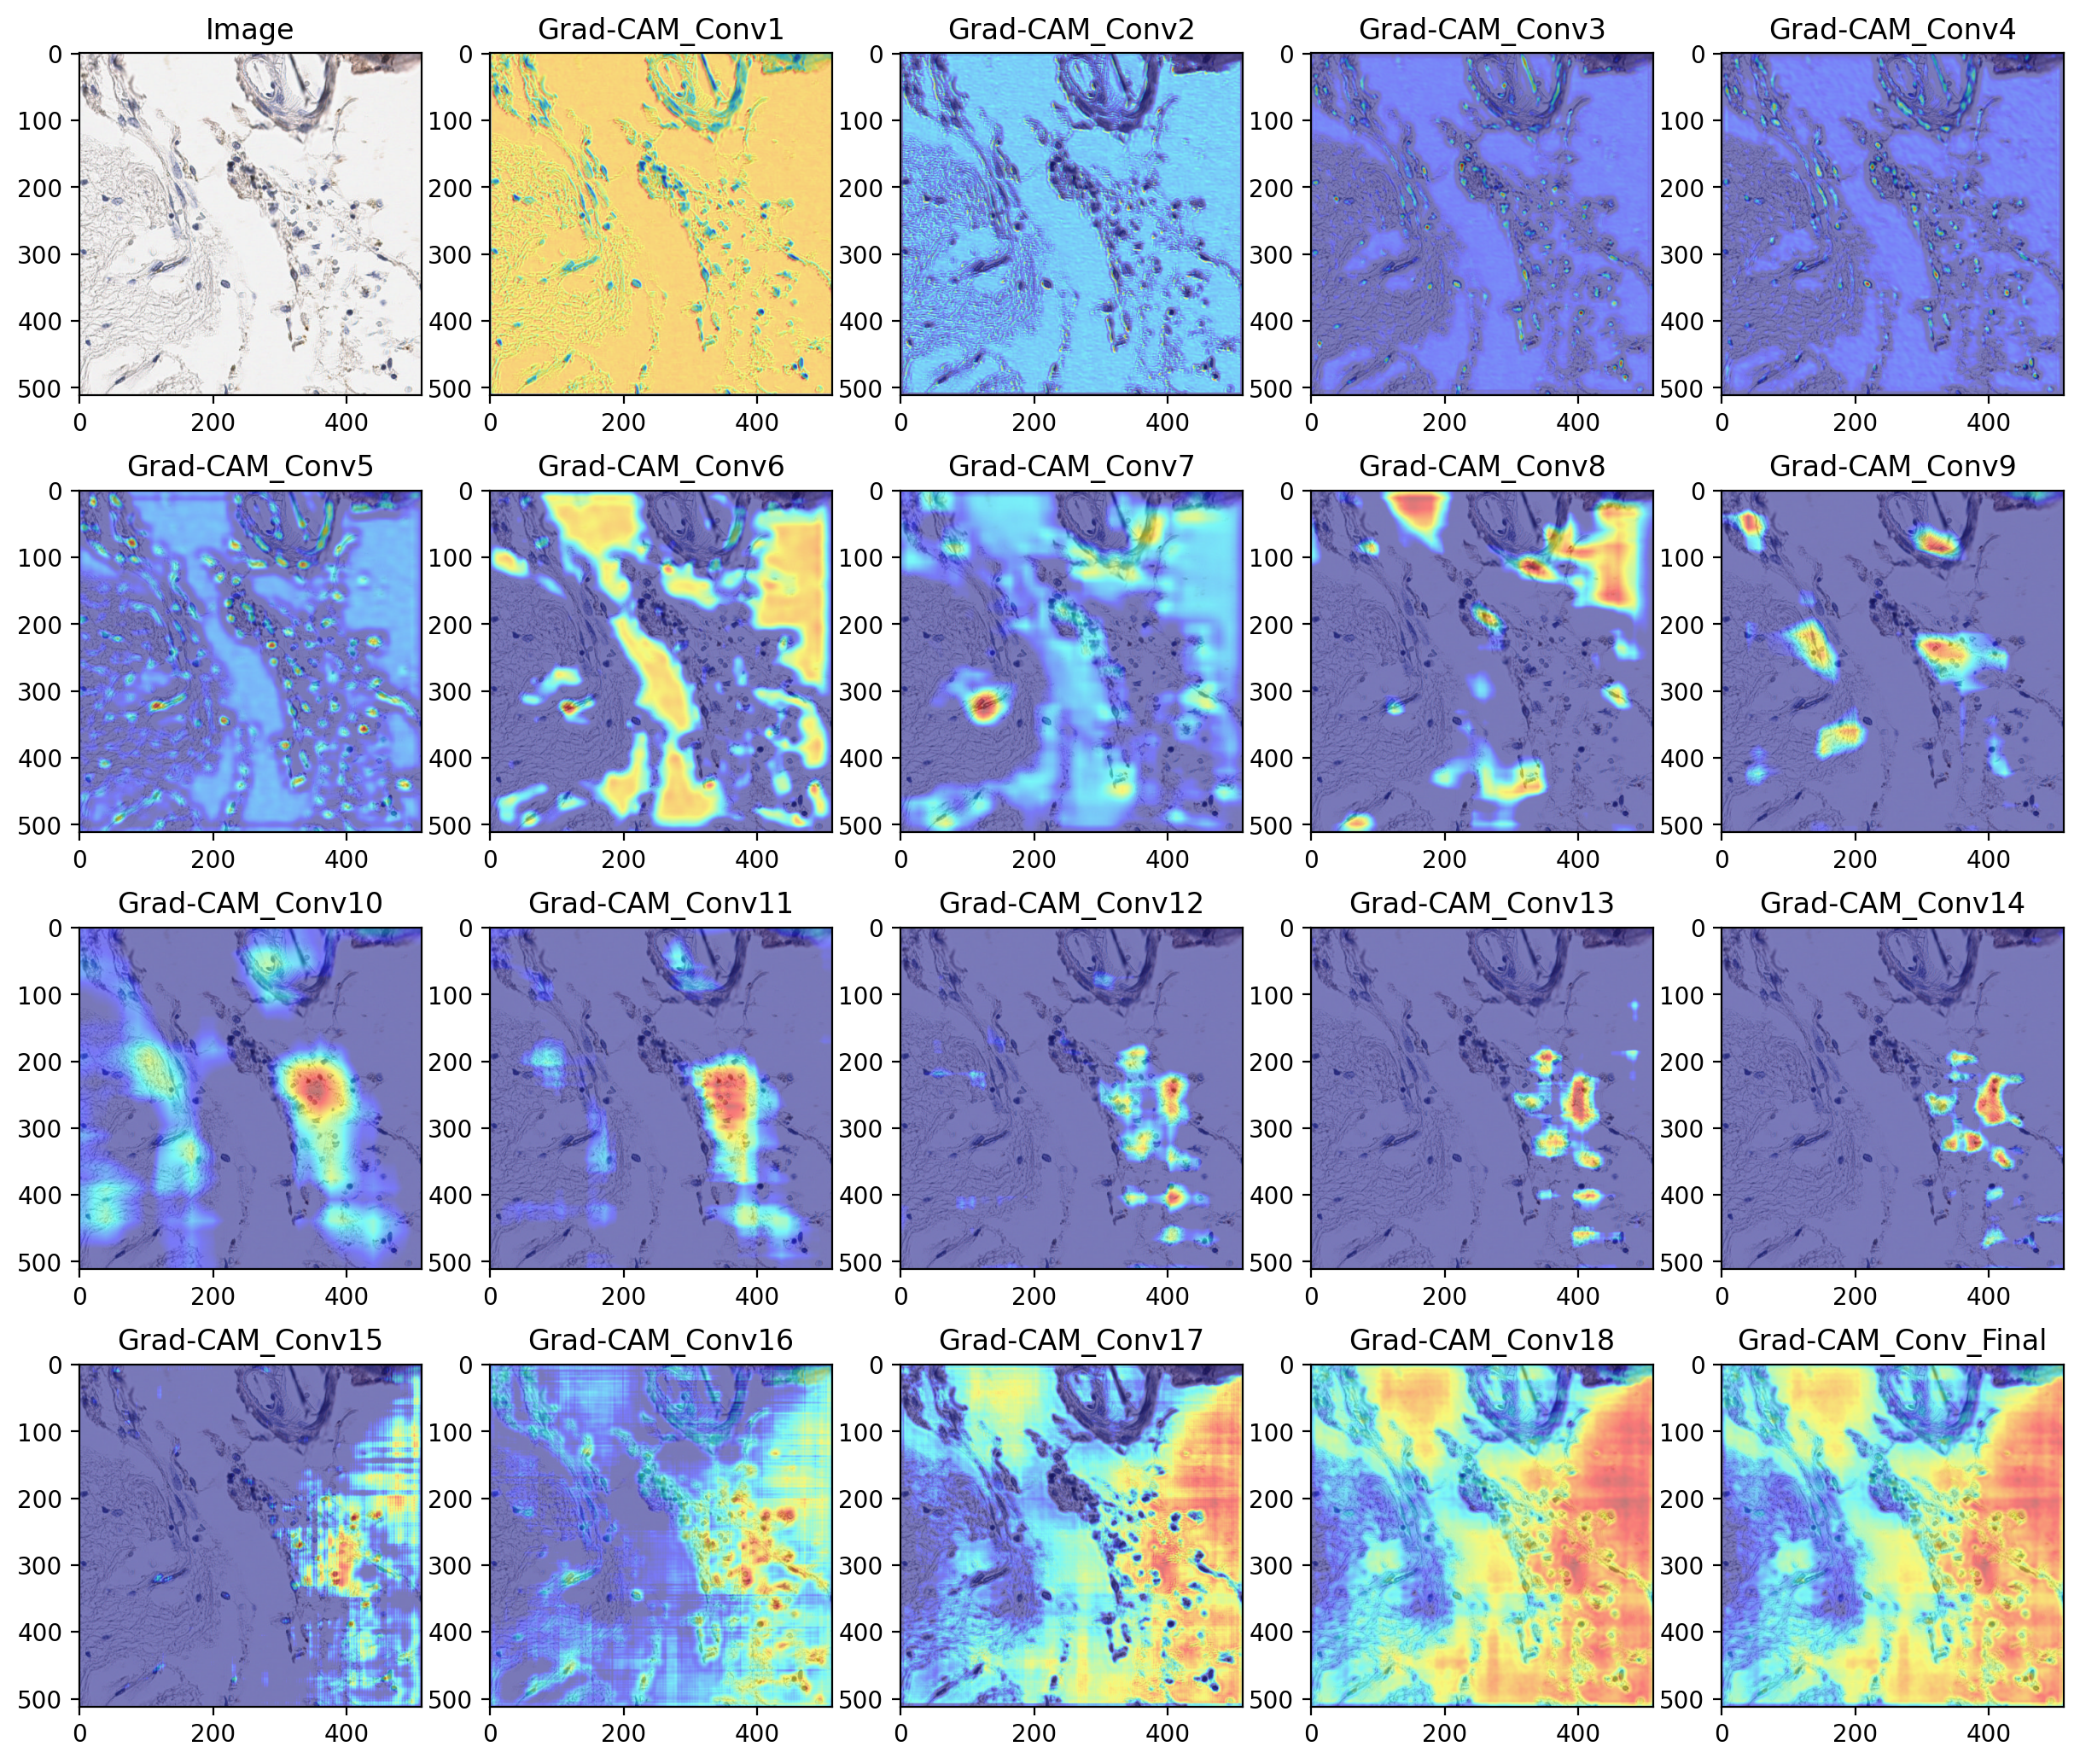

In [25]:
image_idx = 6
class_idx = 0

image, truth_mask = Image.open(images[image_idx]), Image.open(truth_masks[image_idx])
preprocessed_input = np.array([np.array(image)], dtype=np.float32) / 255.0

predictions, cam = grad_cam(model, preprocessed_input, class_idx, 'Concate1')
predicted_mask = np.argmax(predictions, axis=-1)
predicted_class_logits = predictions[..., class_idx]
predicted_class_logits = (predicted_class_logits - np.amin(predicted_class_logits)) / (np.amax(predicted_class_logits) - np.amin(predicted_class_logits))
predicted_class_logits = np.uint8(255 * predicted_class_logits)

cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
cam_overlay = cv2.addWeighted(cv2.cvtColor(np.array(image, dtype=np.uint8), cv2.COLOR_RGB2BGR), 0.7, cam, 0.3, 0)
cam_overlay = cv2.cvtColor(cam_overlay, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=200)
axs[0][0].imshow(image)
axs[0][0].set_title('Image')

ax1_img = axs[0][1].imshow(np.array(truth_mask), cmap='jet', vmin=0, vmax=2)
axs[0][1].set_title('Truth Mask')

ax2_img = axs[1][0].imshow(predicted_mask, cmap='jet', vmin=0, vmax=2)
cbar = fig.colorbar(ax2_img, ax=axs[1][0], ticks=[0, 1, 2]); cbar.ax.set_yticklabels(['BK', 'GM', 'WM'])
axs[1][0].set_title('Predicted Mask')

ax3_img = axs[1][1].imshow(predicted_class_logits, cmap='jet')
fig.colorbar(ax3_img, ax=axs[1][1])
axs[1][1].set_title('Prediction Logits')

# ax3_img = axs[1][1].imshow(cam_overlay, cmap='jet')
# fig.colorbar(ax3_img, ax=axs[1][1])
# axs[1][1].set_title('Grad-CAM')

fig, axs = plt.subplots(4, 5, figsize=(15, 13), dpi=200)
for i, ax in enumerate(np.array(axs).flatten()):
    if i == 0:
        ax.imshow(image); ax.set_title('Image'); continue
    elif i == 19:
        predictions, cam = grad_cam(model, preprocessed_input, class_idx, 'Conv_Final')
    else:
        predictions, cam = grad_cam(model, preprocessed_input, class_idx, f'Conv{i}')
        
    cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
    cam_overlay = cv2.addWeighted(cv2.cvtColor(np.array(image, dtype=np.uint8), cv2.COLOR_RGB2BGR), 0.5, cam, 0.5, 0)
    cam_overlay = cv2.cvtColor(cam_overlay, cv2.COLOR_BGR2RGB)
    
    ax.imshow(cam_overlay, cmap='jet')
    if i == 19:
        ax.set_title('Grad-CAM_Conv_Final')
    else:
        ax.set_title(f'Grad-CAM_Conv{i}')

### Keras Grad-CAM

In [3]:
import sys
sys.path.append("/BrainSeg/src")

import cv2
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

from networks.models.models import get_model, load_whole_model

In [82]:
K.one_hot([1], 3).eval()

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [89]:
def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def grad_cam(input_model, image, category_index, layer_name):
    model = Sequential()
    model.add(input_model)

    nb_classes = 1000
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))
    
    tf.keras.utils.plot_model(model, show_shapes=True)
    
    loss = K.sum(model.layers[-1].output)
    conv_output =  [l for l in model.layers[0].layers if l.name == layer_name][0].output
    tf_grad = tf.gradients(loss, conv_output)
    with tf.compat.v1.Session() as sess:
        print(sess.run(tf_grad))  # 1
    grads = normalize(tf.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap

In [69]:
# model = load_whole_model('/BrainSeg/checkpoints/UNet_Zero_Pad_2019O-20200720_122933_fold_6/cp-005-0.8860.ckpt')
# print('Whole model (weights + optimizer state) loaded')

model = get_model('UNet_Zero_Pad_2019O')
model.load_weights('/BrainSeg/checkpoints/UNet_Zero_Pad_2019O-20200720_122933_fold_6/cp-005-0.8860.ckpt/variables/variables').assert_existing_objects_matched()
print('Model weights loaded')

Model weights loaded


In [90]:
#model = tf.keras.applications.VGG16(weights='imagenet')
preprocessed_input = np.array([np.array(Image.open(images[0]).resize((224, 224)))], dtype=np.float32) / 255.0

predictions = model.predict(preprocessed_input, verbose=1)
# top_1 = decode_predictions(predictions)[0][0]
# print('Predicted class:')
# print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

#predicted_class = np.argmax(predictions, axis=-1)
vals, cnts = np.unique(np.argmax(predictions, axis=-1), return_counts=True)
predicted_class = vals[np.argmax(cnts)]
cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, 'block5_conv3')
plt.imshow(cam)
# cv2.imwrite("gradcam.jpg", cam)

TypeError: Fetch argument None has invalid type <class 'NoneType'>

### Tests

In [35]:
[l for l in model.layers if 'Conv_Final' == l.name][0].output

<tf.Tensor 'Conv_Final/BiasAdd:0' shape=(None, 512, 512, 3) dtype=float32>

In [47]:
model = tf.keras.applications.VGG16(weights='imagenet')
input_model = model
model = Sequential()
model.add(input_model)

nb_classes = 1000
target_layer = lambda x: target_category_loss(x, 1, nb_classes)
model.add(Lambda(target_layer,
                 output_shape = target_category_loss_output_shape))

loss = K.sum(model.layers[-1].output)
# conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output

In [48]:
K.sum(model.layers[-1].output)

<tf.Tensor 'Sum_7:0' shape=() dtype=float32>

In [63]:
[l for l in model.layers[0].layers if 'block5_conv3' == l.name][0].output

<tf.Tensor 'block5_conv3_1/Relu:0' shape=(None, 14, 14, 512) dtype=float32>

In [50]:
[l.name for l in model.layers[0].layers]

['input_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool',
 'flatten',
 'fc1',
 'fc2',
 'predictions']